In [1]:
'''
문제 주제
매출 데이터 시각화 시스템 개발

문제 내용
1년간의 매출 데이터를 분석하여 월별 매출 총합을 시각화 합니다.
SalesAnalysis 클래스를 활용하여 프로그램을 개발합니다.

문제 가이드
    데이터 초기화
        -매출 데이터와 방문자 데이터는 매일 기록되며, 2024년 1월 1일부터 2024년 12월 31일까지의
        데이터가 포함됩니다.
        -각 날짜에 대해 매출 데이터를 생성합니다. -> pd.data_range('2024-01-01', '2024-12-31', freq='D')
        -매출 데이터는 1000 ~ 10000 사이의 정수로 랜덤 생성합니다.
            <- 넘파이 이용해서 랜덤한 데이터 생성
            <- np.random.randint(1000, 10000, len(dates))

월별 매출 총합을 꺾은선 그래프로 시각화 합니다.
'''

"\n문제 주제\n매출 데이터 시각화 시스템 개발\n\n문제 내용\n1년간의 매출 데이터를 분석하여 월별 매출 총합을 시각화 합니다.\nSalesAnalysis 클래스를 활용하여 프로그램을 개발합니다.\n\n문제 가이드\n    데이터 초기화\n        -매출 데이터와 방문자 데이터는 매일 기록되며, 2024년 1월 1일부터 2024년 12월 31일까지의\n        데이터가 포함됩니다.\n        -각 날짜에 대해 매출 데이터를 생성합니다. -> pd.data_range('2024-01-01', '2024-12-31', freq='D')\n        -매출 데이터는 1000 ~ 10000 사이의 정수로 랜덤 생성합니다.\n            <- 넘파이 이용해서 랜덤한 데이터 생성\n            <- np.random.randint(1000, 10000, len(dates))\n\n월별 매출 총합을 꺾은선 그래프로 시가화 합니다.\n"

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='month')


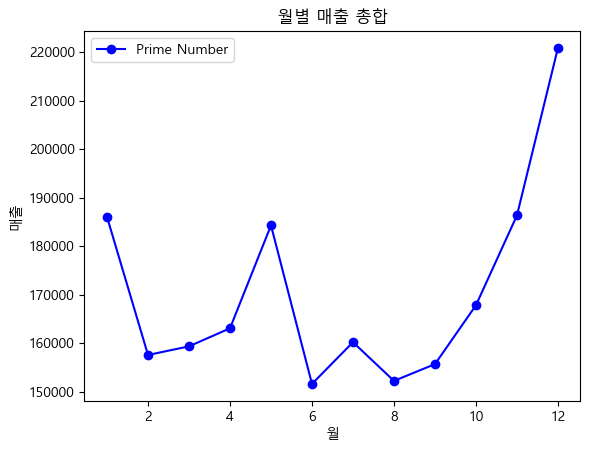

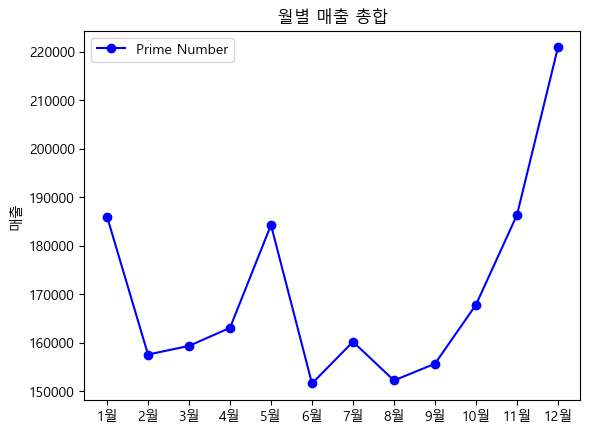

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class SalesAnalysis :
    def __init__(self):
        dates = pd.date_range('2024-01-01', '2024-12-31', freq='D')
        D_dates = {
            'date' : dates,
        }
        self.df = pd.DataFrame(D_dates)
        self.df['sales'] = np.random.randint(1000, 10000, len(self.df))
        month = {
            'month' : [],
            'sales' : []
        }
        self.month_df = pd.DataFrame(month)

    def monthly_linegraph(self):
        for i in range(1,13):
            month_sales = 0
            for day,d_sales in zip(self.df['date'], self.df['sales']):
                if f'2024-{i:02}' == str(day)[:7]:
                    month_sales += d_sales
            data = {
                'month' : [f'{i}월'],
                'sales' : [month_sales]
            }
            df_data = pd.DataFrame(data)
            self.month_df = pd.concat([self.month_df, df_data], ignore_index=True)

        plt.rc('font', family='Malgun Gothic')
        plt.plot(self.month_df['month'], self.month_df['sales'], marker='o', linestyle='-', color='b', label='Prime Number')

        plt.title("월별 매출 총합")
        plt.ylabel("매출")
        plt.legend()

        plt.show()

    def monthly_linegraph2(self):
        self.df['month'] = self.df['date'].dt.month
        monthly_sales = self.df.groupby('month')['sales'].sum()
        print(monthly_sales.index)
        plt.rc('font', family='Malgun Gothic')
        plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b', label='Prime Number')

        plt.title("월별 매출 총합")
        plt.xlabel("월")
        plt.ylabel("매출")
        plt.legend()

        plt.show()
if __name__ == '__main__':
    sales = SalesAnalysis()
    sales.monthly_linegraph2()
    sales.monthly_linegraph()


In [2]:
import pandas as pd
import numpy as np

dates = pd.date_range('2024-01-01', '2024-12-31', freq='D')
D_dates = {
    'date' : dates,
}
df = pd.DataFrame(D_dates)
df['sales'] = np.random.randint(1000, 10000, len(df))
df
#여기서 이제 각 요일을 월별로 통합해야함 그룹화? or 피봇?

,date,sales
0,2024-01-01,8558
1,2024-01-02,3379
2,2024-01-03,9637
3,2024-01-04,1652
4,2024-01-05,6658
...,...,...
361,2024-12-27,5454
362,2024-12-28,5806
363,2024-12-29,4719
364,2024-12-30,5954


In [3]:
month = {
    'month' : [],
    'sales' : []
}
month_df = pd.DataFrame(month)
month_df

,month,sales


In [43]:
for i in range(1,13):
    print(f'{i}월 집계')
    month_sales = 0
    for day,d_sales in zip(df['date'], df['sales']):
        if f'2024-{i:02}' == str(day)[:7]:
            month_sales += d_sales
    data = {
        'month' : [f'{i}월'],
        'sales' : [month_sales]
    }
    df_data = pd.DataFrame(data)
    month_df = pd.concat([month_df, df_data], ignore_index=True)
    print('총 판매액 : ', month_sales)

month_df

1월 집계
총 판매액 :  173038
2월 집계
총 판매액 :  176653
3월 집계
총 판매액 :  158137
4월 집계
총 판매액 :  171566
5월 집계
총 판매액 :  177818
6월 집계
총 판매액 :  168816
7월 집계
총 판매액 :  184669
8월 집계
총 판매액 :  163576
9월 집계
총 판매액 :  168227
10월 집계
총 판매액 :  171954
11월 집계
총 판매액 :  156799
12월 집계
총 판매액 :  180566


,month,sales
0,1월,173038.0
1,2월,176653.0
2,3월,158137.0
3,4월,171566.0
4,5월,177818.0
5,6월,168816.0
6,7월,184669.0
7,8월,163576.0
8,9월,168227.0
9,10월,171954.0


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\I

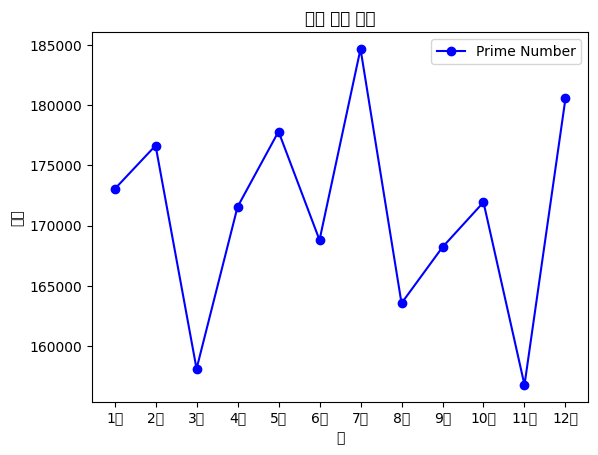

In [44]:
import matplotlib.pyplot as plt

plt.plot(month_df['month'], month_df['sales'], marker='o', linestyle='-', color='b', label='Prime Number')

plt.title("월별 매출 총합")
plt.xlabel("월")
plt.ylabel("매출")
plt.legend()

plt.show()

In [4]:
import pandas as pd
import numpy as np

dates = pd.date_range('2024-01-01', '2024-12-31', freq='D')
D_dates = {
    'date' : dates,
}
df = pd.DataFrame(D_dates)
df['sales'] = np.random.randint(1000, 10000, len(df))
df
#여기서 이제 각 요일을 월별로 통합해야함 그룹화? or 피봇?

,date,sales
0,2024-01-01,7692
1,2024-01-02,2056
2,2024-01-03,9526
3,2024-01-04,9395
4,2024-01-05,4923
...,...,...
361,2024-12-27,3774
362,2024-12-28,9919
363,2024-12-29,6248
364,2024-12-30,4775


In [5]:
print(df['date'], len(df['date']))

0     2024-01-01
1     2024-01-02
2     2024-01-03
3     2024-01-04
4     2024-01-05
         ...    
361   2024-12-27
362   2024-12-28
363   2024-12-29
364   2024-12-30
365   2024-12-31
Name: date, Length: 366, dtype: datetime64[ns] 366


In [56]:
df['month'] = df['date'].dt.month
print(df)

          date  sales  month
0   2024-01-01   1737      1
1   2024-01-02   5343      1
2   2024-01-03   7319      1
3   2024-01-04   9567      1
4   2024-01-05   6112      1
..         ...    ...    ...
361 2024-12-27   5191     12
362 2024-12-28   2279     12
363 2024-12-29   6083     12
364 2024-12-30   6288     12
365 2024-12-31   2940     12

[366 rows x 3 columns]
158407


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\I

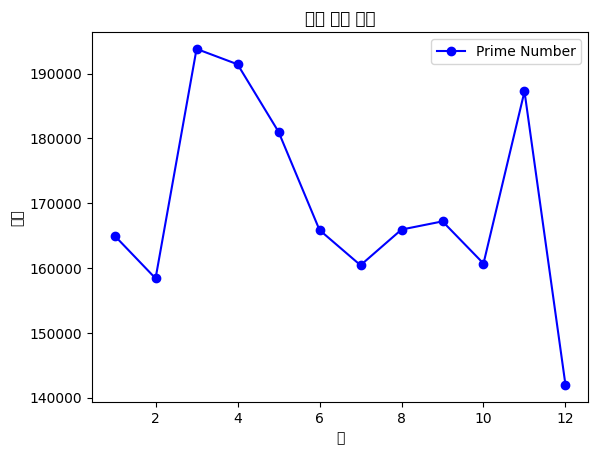

In [67]:
monthly_sales = df.groupby('month')['sales'].sum()
x = []
y = []
for month, sales in monthly_sales.items():
    x.append(month)
    y.append(sales)

# 그래프 생성
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Prime Number')

# 그래프 설정
plt.title("월별 매출 총합")
plt.xlabel("월")
plt.ylabel("매출")
plt.legend()

# 그래프 출력
plt.show()